# Import des bibliothèques nécessaires

In [29]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.datasets import fetch_20newsgroups
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import torch

# Fonction pour effectuer la réduction de dimension avec ACP

In [30]:
def perform_pca(data, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data)
    return pca_result

# Fonction pour effectuer le clustering avec k-means

In [31]:
def perform_kmeans(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    pred = kmeans.fit_predict(data)
    return pred

# Fonction pour évaluer les résultats du clustering

In [32]:
def evaluate_clustering(true_labels, pred_labels):
    nmi_score = normalized_mutual_info_score(true_labels, pred_labels)
    ari_score = adjusted_rand_score(true_labels, pred_labels)
    return nmi_score, ari_score

# Import des données NG20

In [33]:
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))
print(k)

20


In [34]:
# Utilisation de TF-IDF pour mieux représenter les documents
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
normalized_tfidf = normalize(tfidf_matrix)

# Embedding

In [35]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# Réduction de dimension avec ACP

In [36]:
pca_result = perform_pca(embeddings, 20)

# Clustering avec k-means

In [37]:
pred_labels = perform_kmeans(pca_result, k)

# Évaluation des résultats du clustering

In [38]:
nmi_score, ari_score = evaluate_clustering(labels, pred_labels)

# Affichage des résultats
print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.41 
ARI: 0.25


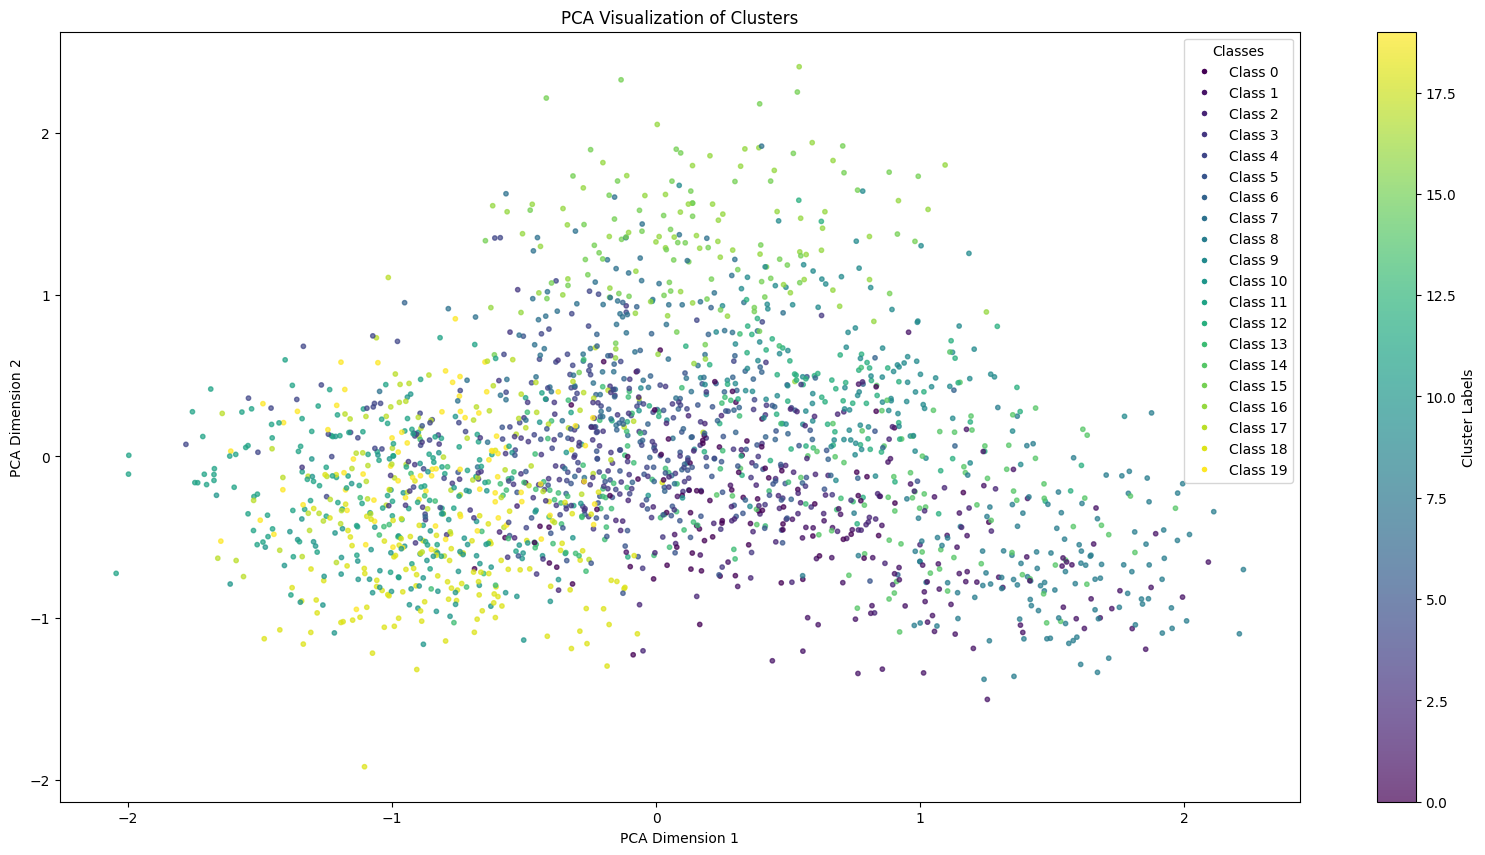

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisation des clusters
plt.figure(figsize=(20, 10))  # Corrected syntax
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=pred_labels, cmap='viridis', alpha=0.7, s=10)
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')

# Ajout d'une légende pour les classes
legend_labels = np.unique(pred_labels)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Class {label}', 
                             markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in legend_labels]
plt.legend(handles=legend_handles, title='Classes')

# Affichage de la colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels')

plt.show()